<a href="https://colab.research.google.com/github/wwoliver19/Projects/blob/main/MSFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/MyDrive/KSU/IT7103Practical/Assignment 3/stroke.csv'

In [3]:
import pandas as pd
import numpy as np


In [4]:
stroke_data = pd.read_csv(file_path)
stroke_data.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
stroke_data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [7]:
from sklearn.model_selection import train_test_split

traindata, testdata = train_test_split(stroke_data, test_size=0.2)
traindata.shape, testdata.shape

((4088, 12), (1022, 12))

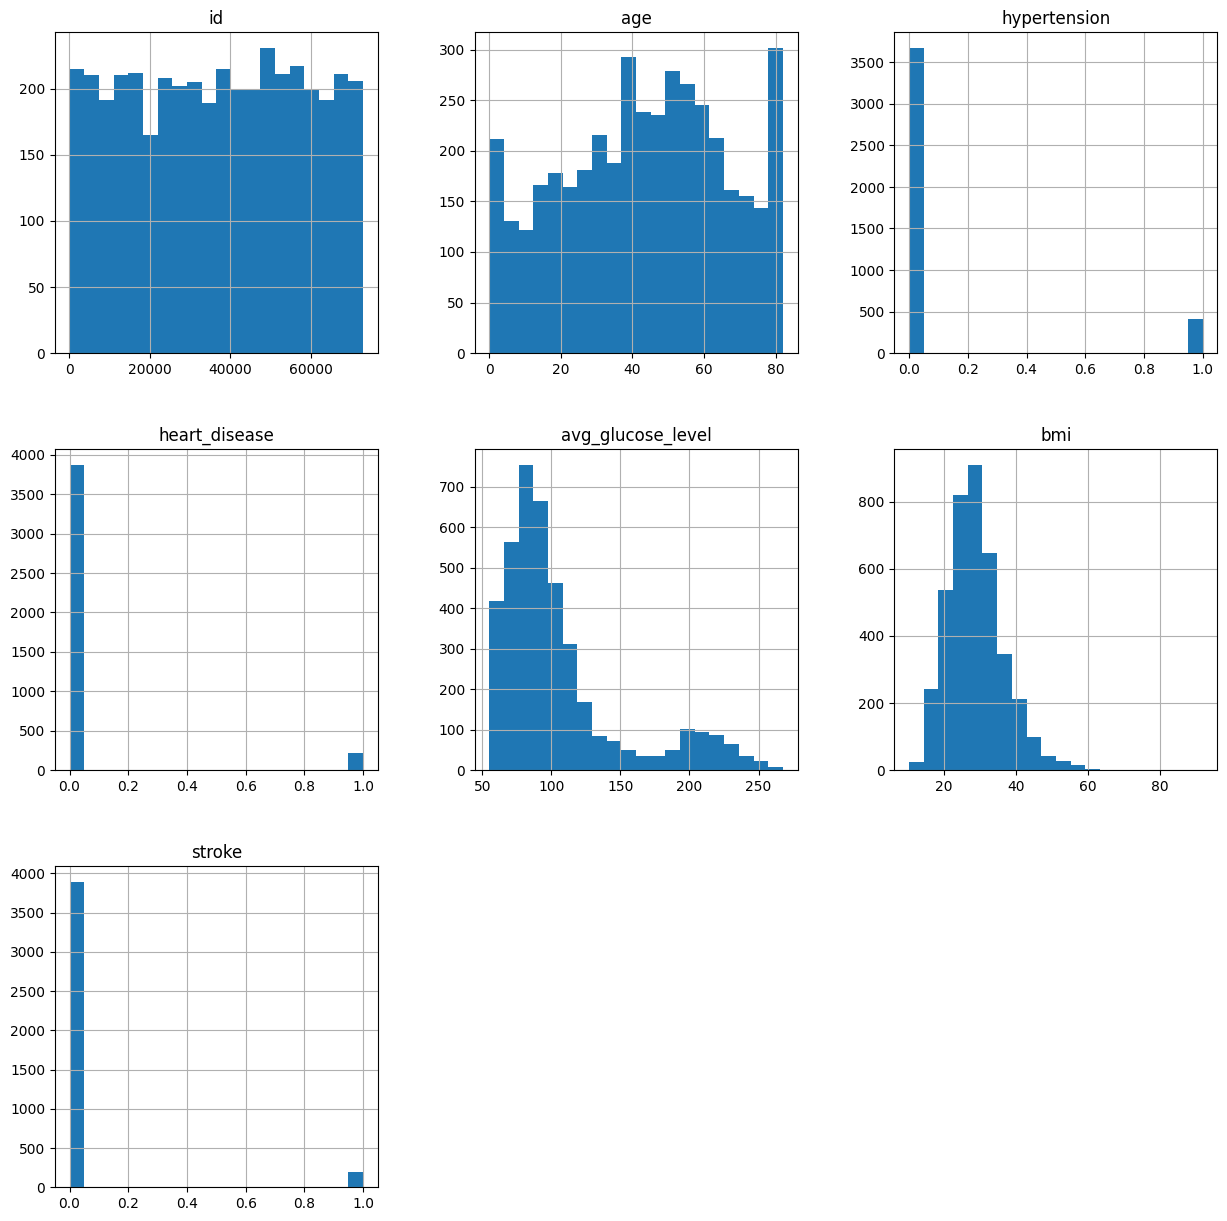

In [8]:
from matplotlib import pyplot as plt

traindata.hist(bins=20, figsize=(15,15))
plt.show()

In [9]:
num_cols = [column for column in stroke_data.columns if (traindata[column].dtypes == np.int64) or (traindata[column].dtypes == np.float64)]
num_cols.remove('id')
num_cols

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

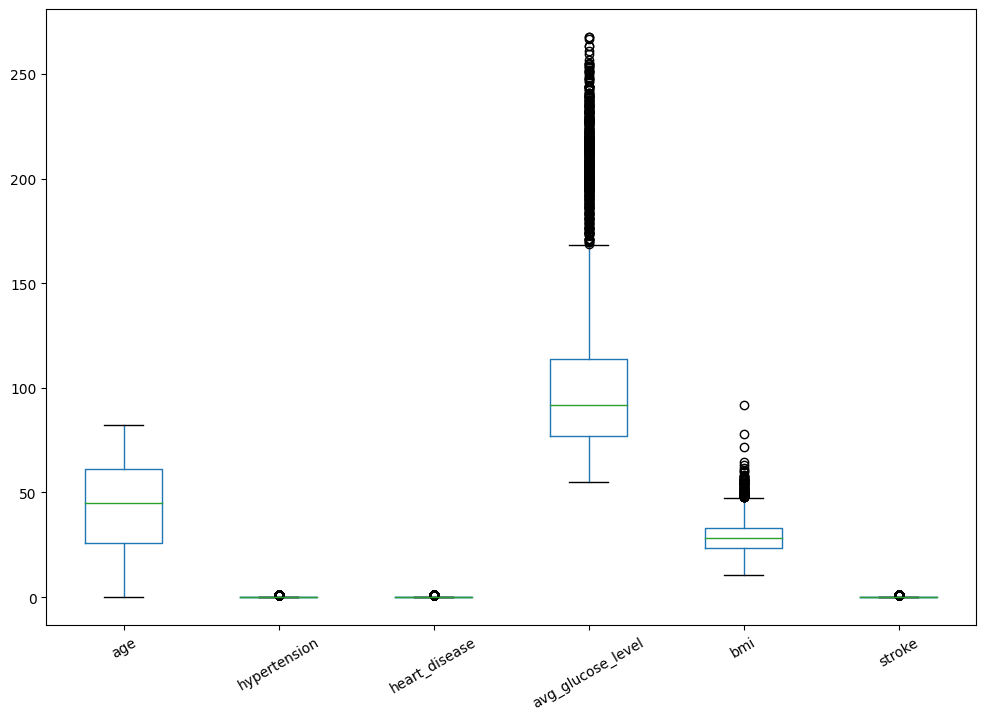

In [10]:
traindata[num_cols].boxplot(grid = False, figsize = (12, 8), rot = 30)
plt.show()

In [11]:
cat_cols = [column for column in stroke_data.columns if (traindata[column].dtypes == object)]
cat_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

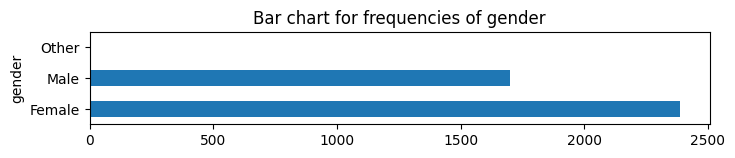

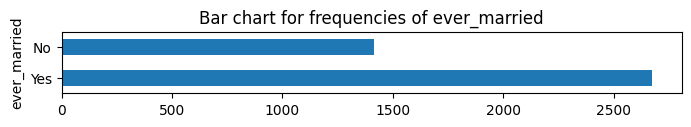

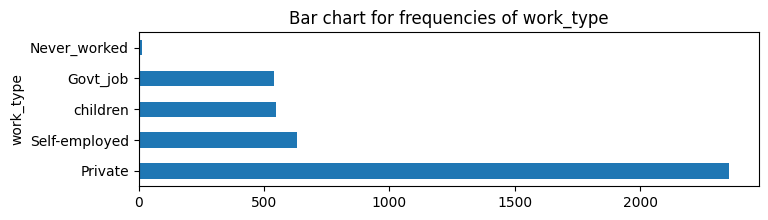

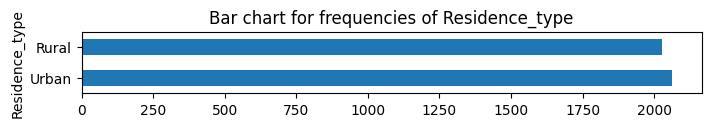

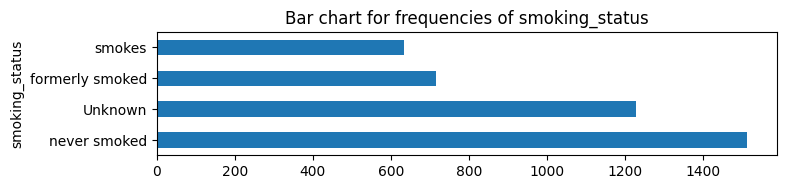

In [12]:
for col in cat_cols:
  freq_table = traindata[col].value_counts()
  plt.figure(figsize = (8, len(freq_table)*0.4))
  freq_table.plot.barh(title = 'Bar chart for frequencies of ' + col)
  plt.show()
  print()

In [13]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [14]:
symnum_cols = ['age']
log_cols = ['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
target = 'stroke'

In [15]:
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

symnum_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler())
])


def log_transformation(x):
    return np.log(x+0.1)


log_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('log transform', FunctionTransformer(log_transformation)),
    ('standardize', StandardScaler())
])

processing_pipeline = ColumnTransformer([
    ('symnum', symnum_pipeline, symnum_cols),
    ('log', log_pipeline, log_cols),
    ('cat', OneHotEncoder(max_categories=5, handle_unknown='infrequent_if_exist'), cat_cols)
])





In [16]:
processing_pipeline

ColumnTransformer(transformers=[('symnum',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['age']),
                                ('log',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('log transform',
                                                  FunctionTransformer(func=<function log_transformation at 0x7fc13a3b8c10>)),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['hypertension', 'heart_disease',
                                  'avg_glucose_level', 'bmi']),
                                ('cat',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist',
                                               max_categories=5),
                                 ['gender', 'ever_married', 'work_type',
                                  'Residence_type', 'smoking_status'])])

In [17]:
from sklearn.model_selection import train_test_split

stroke_traindata, stroke_testdata = train_test_split(stroke_data, test_size=0.2)
stroke_traindata.shape, stroke_testdata.shape

((4088, 12), (1022, 12))

In [18]:
from sklearn.linear_model import LogisticRegression

logistic_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('logistic', LogisticRegression())
])

logistic_pipeline.fit(stroke_traindata, stroke_traindata[target])

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('symnum',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('log',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x7fc13a3b8c10>)),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=5),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])])),
                ('logistic', LogisticRegression())])

In [19]:
logistic_predict = logistic_pipeline.predict(stroke_traindata)

from sklearn.metrics import accuracy_score

accuracy_score(stroke_traindata[target], logistic_predict)

0.9522994129158513

In [20]:
from sklearn.tree import DecisionTreeClassifier

tree_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('tree', DecisionTreeClassifier())
])

tree_pipeline.fit(stroke_traindata, stroke_traindata[target])

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('symnum',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('log',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x7fc13a3b8c10>)),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=5),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])])),
                ('tree', DecisionTreeClassifier())])

In [21]:
tree_predict = tree_pipeline.predict(stroke_traindata)

accuracy_score(stroke_traindata[target], tree_predict)

1.0

In [22]:
tree_predict_test = tree_pipeline.predict(stroke_testdata)

accuracy_score(stroke_testdata[target], tree_predict_test)

0.901174168297456

In [23]:
from sklearn.ensemble import RandomForestClassifier

forest_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('forest', RandomForestClassifier())
])

forest_pipeline.fit(stroke_traindata, stroke_traindata[target])

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('symnum',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('log',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x7fc13a3b8c10>)),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=5),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])])),
                ('forest', RandomForestClassifier())])

In [24]:
forest_predict = forest_pipeline.predict(stroke_traindata)

accuracy_score(stroke_traindata[target], forest_predict)

0.9997553816046967

In [25]:
forest_predict_test = forest_pipeline.predict(stroke_testdata)

accuracy_score(stroke_testdata[target], forest_predict_test)

0.9461839530332681

Logistic Finetuning


In [26]:
from sklearn.model_selection import GridSearchCV

logistic = LogisticRegression(max_iter=1000)
param_grid_log = [{'C': [0.001, 0.01, 0.1, 1, 10, 100,]}]
grid_search = GridSearchCV(logistic, param_grid_log, cv=5, scoring='accuracy', return_train_score = True)

logistic_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('logistic', grid_search)
])

logistic_pipeline.fit(stroke_traindata, stroke_traindata[target])



Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('symnum',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('log',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x7fc13a3b8c10>)),
                                                                  ('standardize',
                                                                   St...
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=5),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])])),
                ('logistic',
                 GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
                              param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10,
                                                 100]}],
                              return_train_score=True, scoring='accuracy'))])

In [27]:
logistic_predict = logistic_pipeline.predict(stroke_traindata)

accuracy_score(stroke_traindata[target], logistic_predict)

0.952054794520548

Decision Tree Finetuning

In [28]:
param_grid_tree = [{
    'max_depth': [ 2, 3, 4, 5,],
    'max_features': [ 5, 10, 15, 20],
    'min_samples_split': [ 25, 50, 100, 200],
    'min_samples_leaf': [ 25, 50, 100, 200]
}]

tree = DecisionTreeClassifier()

grid_search = GridSearchCV(tree, param_grid_tree, cv=5, scoring='accuracy', return_train_score = True)

tree_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('tree', grid_search)
])

tree_pipeline.fit(stroke_traindata, stroke_traindata[target])

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('symnum',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('log',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x7fc13a3b8c10>)),
                                                                  ('standardize',
                                                                   St...
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=5),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])])),
                ('tree',
                 GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                              param_grid=[{'max_depth': [2, 3, 4, 5],
                                           'max_features': [5, 10, 15, 20],
                                           'min_samples_leaf': [25, 50, 100,
                                                                200],
                                           'min_samples_split': [25, 50, 100,
                                                                 200]}],
                              return_train_score=True, scoring='accuracy'))])

In [29]:
tree_predict = tree_pipeline.predict(stroke_traindata)

accuracy_score(stroke_traindata[target], tree_predict)

0.952054794520548

Random Forest Finetuning

In [30]:
param_grid_forest = [{
    'n_estimators': [ 5, 10, 15, 20],
    'max_depth': [ 2, 3, 4, 5,],
    'max_features': [ 5, 10, 15, 20],
    'min_samples_split': [ 25, 50, 100, 200],
    'min_samples_leaf': [ 25, 50, 100, 200]
}]

forest = RandomForestClassifier()

grid_search = GridSearchCV(forest, param_grid_forest, cv=5, scoring='accuracy', return_train_score = True)

forest_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('forest', grid_search)
])

forest_pipeline.fit(stroke_traindata, stroke_traindata[target])

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('symnum',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('log',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x7fc13a3b8c10>)),
                                                                  ('standardize',
                                                                   St...
                                                                max_categories=5),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])])),
                ('forest',
                 GridSearchCV(cv=5, estimator=RandomForestClassifier(),
                              param_grid=[{'max_depth': [2, 3, 4, 5],
                                           'max_features': [5, 10, 15, 20],
                                           'min_samples_leaf': [25, 50, 100,
                                                                200],
                                           'min_samples_split': [25, 50, 100,
                                                                 200],
                                           'n_estimators': [5, 10, 15, 20]}],
                              return_train_score=True, scoring='accuracy'))])

In [31]:
forest_predict = forest_pipeline.predict(stroke_traindata)

accuracy_score(stroke_traindata[target], forest_predict)

0.952054794520548

Trained Models Applied to Test Data

In [32]:
logistic_predict_test = logistic_pipeline.predict(stroke_testdata)

accuracy_score(stroke_testdata[target], logistic_predict_test)


0.9481409001956947

In [33]:
tree_predict_test = tree_pipeline.predict(stroke_testdata)

accuracy_score(stroke_testdata[target], tree_predict_test)

0.9481409001956947

In [34]:
forest_predict_test = forest_pipeline.predict(stroke_testdata)

accuracy_score(stroke_testdata[target], forest_predict_test)

0.9481409001956947